In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import sklearn
import datetime

<h1>Load smart meter train set to get label for training</h1>

In [2]:
file_path = os.path.dirname(os.path.abspath(""))

In [3]:
interim_dataset_folder = os.path.abspath(os.path.join(file_path, "./data/interim"))
smart_meter_train_pickle_path = interim_dataset_folder + "./train_pickle.pkl"
# Read pickle version of pre-processed smart meter dataset
smart_meter_train = pd.read_pickle(smart_meter_train_pickle_path)

In [4]:
smart_meter_label = smart_meter_train["Consumption"]

<h1>Load preprocessed smart meter train set (array) for training</h1>

In [5]:
preprocessed_dataset_folder = os.path.abspath(os.path.join(file_path, "./data/preprocessed"))
preprossed_smart_meter_train_path = preprocessed_dataset_folder + "./preprocessed_smdb_train_npy.npy"
preprossed_smart_meter_train = np.load(preprossed_smart_meter_train_path)

<h1>Dimension reduction</h1>

In [7]:
train_set = preprossed_smart_meter_train.copy()

In [48]:
# Using first 16 components because they explain more than 95%
projection_matrix = (eigen_vectors.T[:][:17]).T
print(projection_matrix)

[[-2.57578394e-02 -6.55428228e-01  1.25530476e-01 -6.16518885e-02
  -4.38249652e-01  5.47196131e-01  1.59935535e-03  7.52423460e-03
  -2.41632610e-02  3.82926293e-02 -7.83383706e-02  4.16432613e-04
   5.57424788e-02 -1.06764199e-02  3.51974978e-02  8.36525451e-02
  -8.79259390e-02]
 [ 4.91379318e-01 -1.54419043e-01  2.20611549e-01  2.00360838e-01
   2.40854549e-01 -2.13462231e-01 -2.54565986e-03  1.39858242e-02
   6.39695015e-02  4.59175429e-01 -4.76820170e-01 -1.39711263e-03
  -1.12458225e-02  2.38146696e-02  6.33937822e-02  8.53510255e-02
  -1.35962364e-01]
 [ 4.48725059e-01 -2.02952135e-02 -4.47501007e-01 -2.00241340e-01
  -4.19618309e-02 -1.56698635e-03 -3.26456194e-04  2.04437710e-03
  -5.21833017e-01 -4.14559756e-01 -3.13116395e-01  5.48026247e-04
   3.61656156e-02  1.73398372e-02 -4.68665666e-02  8.46785037e-02
   7.00877118e-03]
 [ 4.40352812e-01 -9.37189639e-02 -4.31363965e-01 -2.96938858e-01
  -3.09646392e-02  1.40646896e-02  1.10844579e-04 -1.55609949e-02
   6.64660764e-01  

In [8]:
from sklearn.decomposition import FactorAnalysis

In [14]:
from factor_analyzer import FactorAnalyzer

In [20]:
fa = FactorAnalyzer(rotation=None)

In [21]:
fa.fit(train_set)

C:\Users\LilyChau\Anaconda3\lib\site-packages\factor_analyzer\utils.py:91: RuntimeWarning: invalid value encountered in true_divide
  x = (x - x.mean(0)) / x.std(0)


ValueError: array must not contain infs or NaNs

In [17]:
FactorAnalyzer.calculate_bartlett_sphericity

AttributeError: type object 'FactorAnalyzer' has no attribute 'calculate_bartlett_sphericity'

In [ ]:
from FactorAnalyzer.FactorAnalyzer import calculate_bartlett_sphericity
from FactorAnalyzer.FactorAnalyzer import calculate_kmo

In [11]:
from factor_analyzer import FactorAnalyzer

In [12]:
factor_analyzer

NameError: name 'factor_analyzer' is not defined

In [10]:
factor_analyzer.FactorAnalyzer

NameError: name 'factor_analyzer' is not defined

In [9]:
fa = FactorAnalysis()
reduced_train_set= fa.fit_transform(train_set)

In [28]:
# Identigy components that explain at least 95%

cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 29.62730978  45.39650868  59.7379817   67.28490248  72.43373083
  76.58824228  80.329425    83.20279688  83.39065708  83.81863888
  84.34305268  86.58828796  88.75651318  90.83189542  92.41006992
  93.88194097  95.24234917  96.56149629  97.65859375  98.82617969
 100.         100.         100.         100.         100.
 100.        ]


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Explained variance vs Number of components')

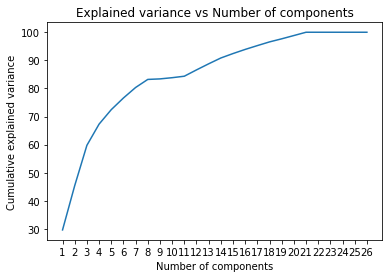

In [41]:
# Visualising the eigenvalues and finding the elbow of the graphic
sns.lineplot(x = list(range(1,len(cumulative_variance_explained)+1)), y = cumulative_variance_explained)
plt.xlabel("Number of components")
plt.xticks(list(range(1,len(cumulative_variance_explained)+1)))
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [10]:
reduced_train_set

array([[-8.08894901e-01,  6.55116952e-01,  9.79244593e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.09265361e-01,  6.54297988e-01,  9.95352592e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.08894901e-01,  6.55116952e-01,  9.79244593e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.69127924e-03, -1.37888938e+00,  1.02621969e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.64024907e-01, -1.38760136e+00,  1.71022714e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.89211544e-02,  1.27384722e+00,  1.01746130e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [21]:
FactorAnalysis.FactorAnalyzer

AttributeError: type object 'FactorAnalysis' has no attribute 'FactorAnalyzer'

In [17]:
fa.get_eigenvalues()

AttributeError: 'FactorAnalysis' object has no attribute 'get_eigenvalues'

In [14]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA()
reduced_train_set= pca.fit_transform(preprossed_smart_meter_train)

In [57]:
reduced_train_df

array([[ 1.90207218e+00,  6.01886319e-01,  1.10880233e+00, ...,
         1.05806096e-15, -1.25903431e-15,  5.86964138e-17],
       [ 1.90256174e+00,  6.03858227e-01,  1.10840882e+00, ...,
         1.51846005e-16, -4.93548722e-16, -5.20564254e-17],
       [ 1.90207218e+00,  6.01886319e-01,  1.10880233e+00, ...,
        -9.49048748e-17, -3.12058649e-16,  5.07406193e-17],
       ...,
       [-2.64258739e-01,  3.78692864e-02, -1.31031467e+00, ...,
        -3.12970908e-17, -1.20928848e-17,  2.33842944e-18],
       [ 4.12605722e-01,  3.79522772e+00, -2.33354218e+00, ...,
         7.93455334e-18, -5.99665591e-17, -6.81044481e-19],
       [ 1.52805804e-01,  9.23021317e-01,  7.60433072e-01, ...,
         3.03734681e-17, -6.52164668e-17, -2.13840163e-18]])

In [58]:
pca.explained_variance_ratio_

array([2.96273098e-01, 1.57691989e-01, 1.43414730e-01, 7.54692078e-02,
       5.14882836e-02, 4.15451144e-02, 3.74118272e-02, 2.87337188e-02,
       2.24523528e-02, 2.16822522e-02, 2.07538224e-02, 1.57817450e-02,
       1.47187105e-02, 1.36040820e-02, 1.31914712e-02, 1.17382031e-02,
       1.16758594e-02, 1.09709746e-02, 5.24413800e-03, 4.27981805e-03,
       1.87860196e-03, 4.70230311e-33, 3.00223645e-33, 2.83700233e-33,
       1.44032478e-33, 1.44032478e-33])

In [59]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [63]:
d = np.argmax(cumsum >= 0.95)+1

In [67]:
pca2 = PCA(n_components=d)
reduced_train_set2 = pca2.fit_transform(preprossed_smart_meter_train)
cumsum2 = np.cumsum(pca2.explained_variance_ratio_)

In [68]:
cumsum2

array([0.2962731 , 0.45396509, 0.59737982, 0.67284902, 0.72433731,
       0.76588242, 0.80329425, 0.83202797, 0.85448032, 0.87616257,
       0.8969164 , 0.91269814, 0.92741685, 0.94102093, 0.9542124 ])

Text(0.5, 1.0, 'Explained variance vs Number of components')

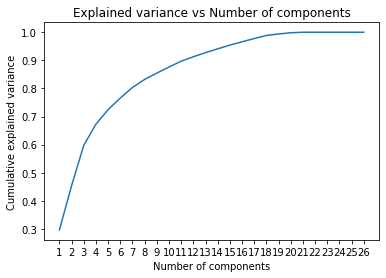

In [73]:
# Visualising the eigenvalues and finding the elbow of the graphic
sns.lineplot(x = list(range(1,len(cumsum)+1)), y = cumsum)
plt.xlabel("Number of components")
plt.xticks(list(range(1,len(cumsum)+1)))
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

<h1>Model selection</h1>

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [7]:
forest_reg = RandomForestRegressor()

In [79]:
forest_reg.fit(preprossed_smart_meter_train,smart_meter_label)

RandomForestRegressor()

In [80]:
smart_meter_predictions = forest_reg.predict(preprossed_smart_meter_train)

In [81]:
forest_mse = mean_squared_error(smart_meter_label, smart_meter_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.21182546519974907

In [82]:
# get importance
importance = forest_reg.feature_importances_

In [83]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10817
Feature: 1, Score: 0.11578
Feature: 2, Score: 0.05266
Feature: 3, Score: 0.05388
Feature: 4, Score: 0.02714
Feature: 5, Score: 0.04164
Feature: 6, Score: 0.11744
Feature: 7, Score: 0.10308
Feature: 8, Score: 0.10858
Feature: 9, Score: 0.10788
Feature: 10, Score: 0.08159
Feature: 11, Score: 0.00508
Feature: 12, Score: 0.00511
Feature: 13, Score: 0.00396
Feature: 14, Score: 0.00236
Feature: 15, Score: 0.00729
Feature: 16, Score: 0.00631
Feature: 17, Score: 0.00714
Feature: 18, Score: 0.00498
Feature: 19, Score: 0.00648
Feature: 20, Score: 0.00742
Feature: 21, Score: 0.00654
Feature: 22, Score: 0.00627
Feature: 23, Score: 0.00708
Feature: 24, Score: 0.00617
Feature: 25, Score: 0.00000


In [84]:
forest_reg2 = RandomForestRegressor()

In [ ]:
forest_reg.fit(reduced_train_set2,smart_meter_label)

In [ ]:
smart_meter_predictions = forest_reg.predict(reduced_train_set2)

In [ ]:
# get importance
importance2 = forest_reg.feature_importances_

In [ ]:
# summarize feature importance
for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))